## AVINASH SHIDGANESH

## THE SPARK FOUNDATION

## Task #1 Prediction Using Supervised ML

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Dataset

In [244]:
# Reading data using Url

url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Viewing dataset values

In [245]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Checking null values and data type

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## viewing shape of dataset

In [247]:
data.shape

(25, 2)

## viewing total null values

In [248]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## scatterplot 

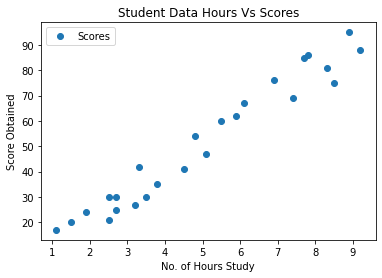

In [249]:
data.plot(x='Hours', y='Scores', style = 'o')
plt.title('Student Data Hours Vs Scores')
plt.xlabel('No. of Hours Study')
plt.ylabel('Score Obtained')
plt.show()

## Distplot

C:\Users\RocKY\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

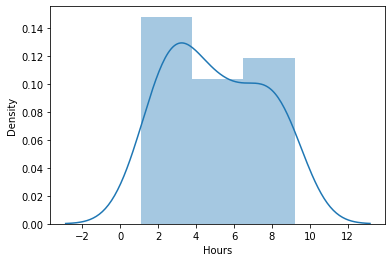

In [250]:
sns.distplot(data['Hours'])
#sns.distplot(score['Scores'])

## Kernel Distribution Estimation Plot 

<AxesSubplot:ylabel='Density'>

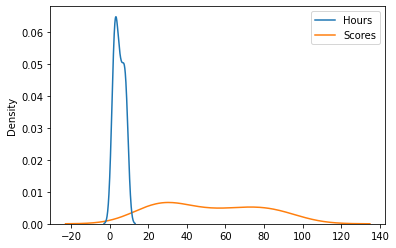

In [251]:
sns.kdeplot(data=data)

## Heat Map

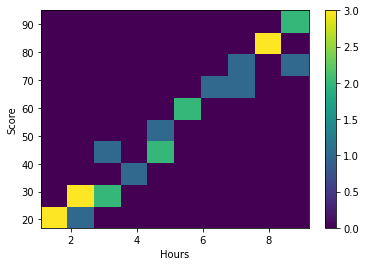

In [252]:
plt.hist2d(data['Hours'],data['Scores'])
plt.xlabel('Hours')
plt.ylabel('Score')
plt.colorbar()
plt.show()

## Heat Map of correlation 

<AxesSubplot:>

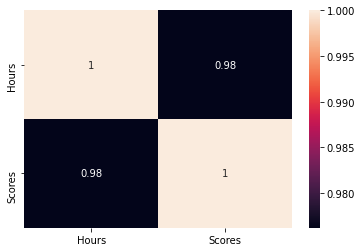

In [253]:
corr = data.corr()
sns.heatmap(data= corr, annot= True)

In [254]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Preparing data for modeling

In [255]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

print('X shape is {}, and Hours of study'.format(X.shape))
print(X[:5])
print('')
print('y shape is {}, and contains scores '.format(y.shape))
print(y[:5])

X shape is (25, 1), and Hours of study
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]

y shape is (25,), and contains scores 
[21 47 27 75 30]


## Splitting data into test and train

In [256]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=0)

## Training the model

In [257]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting test data values

In [258]:
# Predicting scores based on No. of hours of study

y_predict = regressor.predict(X_test)
y_predict.shape

(5,)

## Original scores Vs Predicted scores

In [259]:
p_v = pd.DataFrame({'Original Score':y_test, 'Predicted Score':y_predict})
p_v

,Original Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Graphical representation

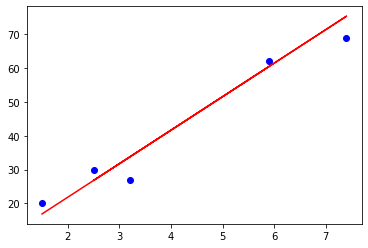

In [260]:

plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_predict, color ='r')

## Predicted values accuracy score

In [261]:
score = regressor.score(X_test, y_test)
print(score*100,'%')

94.54906892105355 %


## Predicting The Score

In [262]:
Score_prediction  = regressor.predict([[9.25]])
print('Predicted score for a student studying 9.25 hours a day is: {}'. format(Score_prediction) )

Predicted score for a student studying 9.25 hours a day is: [93.69173249]


## Conclusion - From our model we can say that if a student studying for 9.25 hours a day, then student we secure 93.69 MARKS